loading libraries

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv('titanic_dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Preprocessing

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<Axes: >

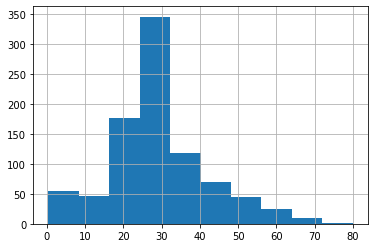

In [43]:
df['Age'].hist()

In [44]:
corr=df.corr()
corr

,Survived,Pclass,Sex,Age,Fare
Survived,1.000000,-0.338481,0.543351,-0.069809,0.257307
Pclass,-0.338481,1.000000,-0.131900,-0.331339,-0.549500
Sex,0.543351,-0.131900,1.000000,-0.084153,0.182333
Age,-0.069809,-0.331339,-0.084153,1.000000,0.091566
Fare,0.257307,-0.549500,0.182333,0.091566,1.000000


<Axes: >

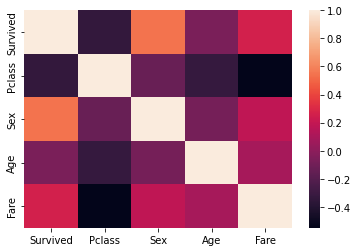

In [46]:
sns.heatmap(corr)

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.shape

(891, 12)

In [10]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Replacing the null values

In [11]:
df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Age'].isnull().sum()

0

In [12]:
df["Cabin"].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [13]:
df["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [14]:
df["Cabin"]=df["Cabin"].ffill()

In [15]:
df["Cabin"]=df["Cabin"].bfill()

In [16]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df.Embarked.fillna(df.Embarked.mode()[0], inplace = True)

In [18]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [19]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,C85,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,C85,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,C123,S


In [20]:

df['Sex'].replace(['male','female'],[0,1],inplace=True)

df.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Cabin','Embarked'], axis = 1, inplace = True)

In [21]:
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,0,22.0,7.2500
1,1,1,1,38.0,71.2833
2,1,3,1,26.0,7.9250
3,1,1,1,35.0,53.1000
4,0,3,0,35.0,8.0500


Modeling

In [22]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Survived'])
y=df['Survived']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

kNN

In [23]:
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
k_range=range(1,26)
scores=[]
for k in k_range:
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(x_train,y_train)
  y_pred=knn.predict(x_test)
  scores.append(metrics.accuracy_score(y_test,y_pred))
print(scores)

[0.6536312849162011, 0.659217877094972, 0.6815642458100558, 0.6927374301675978, 0.6983240223463687, 0.7150837988826816, 0.7094972067039106, 0.6815642458100558, 0.7094972067039106, 0.6927374301675978, 0.6983240223463687, 0.6983240223463687, 0.7039106145251397, 0.7094972067039106, 0.7262569832402235, 0.7094972067039106, 0.7094972067039106, 0.7039106145251397, 0.7039106145251397, 0.7206703910614525, 0.7318435754189944, 0.7150837988826816, 0.7262569832402235, 0.7094972067039106, 0.7150837988826816]


Text(0, 0.5, 'testing accuracy')

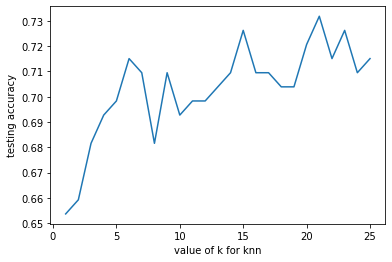

In [24]:
import matplotlib.pyplot as plt
plt.plot(k_range,scores)
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy')

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=22)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
print(metrics.accuracy_score(y_test,y_pred))

0.7150837988826816


SVM

In [26]:
from sklearn.svm import SVC


classifier = SVC()

classifier.fit(x_train,y_train)

score = classifier.score(x_test, y_test)

print(score)

0.6536312849162011


K-fold cross validation

In [41]:
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score
cv=KFold(n_splits=5,random_state=42,shuffle=True)
model=RandomForestRegressor()
scores=cross_val_score(model,x,y,cv=cv,n_jobs=-1)
print(f"Error Mean:{np.mean(scores)}Error std:{np.std(scores)}")
np.array(score).mean()

Error Mean:0.37755764869846037Error std:0.04842768356876149


0.6910112359550562

Stratified k-fold cross validation

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold
accuracy=[]
skf=StratifiedKFold(n_splits=5,random_state=None)
skf.get_n_splits(x,y)
for train_index,test_index in skf.split(x,y):
  print('Train:',train_index,'validation',test_index)
  x1_train,x1_test=x.iloc[train_index],x.iloc[test_index]
  y1_train,y1_test=y.iloc[train_index],y.iloc[test_index]
  classifier.fit(x1_train,y1_train)
  prediction=classifier.predict(x1_test)
  score=accuracy_score(prediction,y1_test)
  accuracy.append(score)
print(accuracy)

Train: [168 169 170 171 173 174 175 176 177 178 179 180 181 182 185 188 189 191
 196 197 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214
 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268
 269 270 271 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286
 287 288 289 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304
 305 306 307 308 309 310 311 312 313 314 315 316 317 318 319 320 321 322
 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340
 341 342 343 344 345 346 347 348 349 350 351 352 353 354 355 356 357 358
 359 360 361 362 363 364 365 366 367 368 369 370 371 372 373 374 375 376
 377 378 379 380 381 382 383 384 385 386 387 388 389 390 391 392 393 394
 395 396 397 398 399 400 401 402 403 404 405 406 407 408 409 410 411 412
 413 414 415 416 417 418 419 420 421 422 423

In [38]:
np.array(accuracy).mean()

0.6701462557278262